In [3]:
#Importing our libraries
import pandas as pd
import numpy as np
from numpy import argmax
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [36]:
#Importing our data, using the delimiter parameter to several the values
df=pd.read_csv("data.csv",delimiter=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [93]:
#Checking the general information about our dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   category
 5   Previous qualification                          4424 non-null   int64   
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

In [91]:
df['Target'].unique()

array([0, 2, 1])

In [92]:
#Converting feature datatypes to more appropriate datatypes

df['Marital status']= df['Marital status'].astype('category')
df['Application mode']=df['Application mode'].astype('category')
df['Course']=df['Course'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['Daytime/evening attendance\t']=df['Daytime/evening attendance\t'].astype('category')
df['Target']=df['Target'].astype('category')
df['International']=df['International'].astype('category')
df['Scholarship holder']=df['Scholarship holder'].astype('category')
df['Debtor']=df['Debtor'].astype('category')
df['Displaced']=df['Displaced'].astype('category')
df['Tuition fees up to date']=df['Tuition fees up to date'].astype('category')
df['Application order']=df['Application order'].astype('category')
df['Nacionality']=df['Nacionality'].astype('category')
df['Educational special needs']=df['Educational special needs'].astype('category')
df['Target']=df['Target'].astype('category')

In [80]:
df.describe()

,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,4.577758,132.613314,19.561935,22.275316,10.960895,11.032324,126.978119,23.265145,0.709991,6.270570,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,10.216592,13.188332,15.603186,15.343108,26.418253,25.263040,14.482001,7.587816,2.360507,2.480178,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,95.000000,1.000000,1.000000,0.000000,0.000000,95.000000,17.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,2.000000,3.000000,4.000000,4.000000,117.900000,19.000000,0.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,19.000000,19.000000,5.000000,7.000000,126.100000,20.000000,0.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,140.000000,37.000000,37.000000,9.000000,9.000000,134.800000,25.000000,0.000000,7.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,43.000000,190.000000,44.000000,44.000000,194.000000,195.000000,190.000000,70.000000,20.000000,26.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [85]:
#mean value of each of the features of our dataset
df.mean(numeric_only=True)

Previous qualification                              4.577758
Previous qualification (grade)                    132.613314
Mother's qualification                             19.561935
Father's qualification                             22.275316
Mother's occupation                                10.960895
Father's occupation                                11.032324
Admission grade                                   126.978119
Age at enrollment                                  23.265145
Curricular units 1st sem (credited)                 0.709991
Curricular units 1st sem (enrolled)                 6.270570
Curricular units 1st sem (evaluations)              8.299051
Curricular units 1st sem (approved)                 4.706600
Curricular units 1st sem (grade)                   10.640822
Curricular units 1st sem (without evaluations)      0.137658
Curricular units 2nd sem (credited)                 0.541817
Curricular units 2nd sem (enrolled)                 6.232143
Curricular units 2nd sem

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

In [14]:
df.duplicated().sum()

0

# Data Inspection

Upon inspection of the dataset, the following were observed

1. The data is made up of 37 columns and 4424 rows
2. There are no null values in the dataset
3. There are no duplicate values

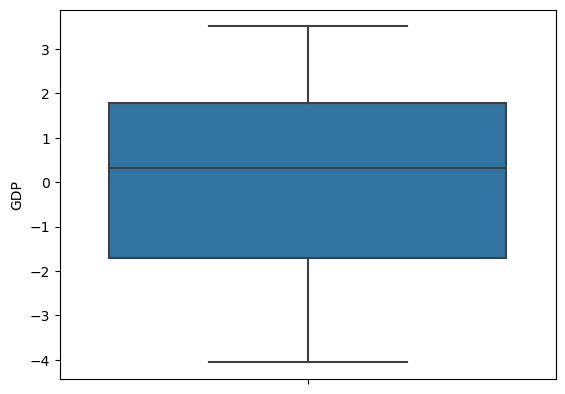

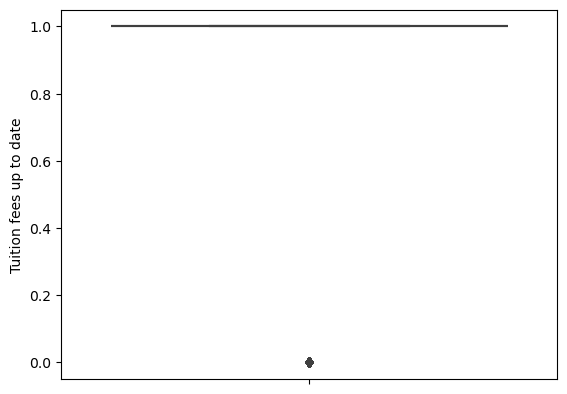

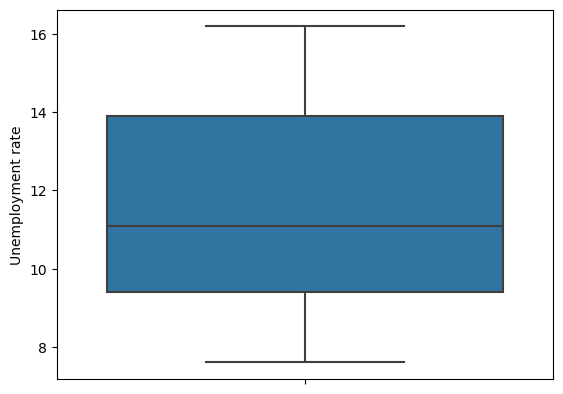

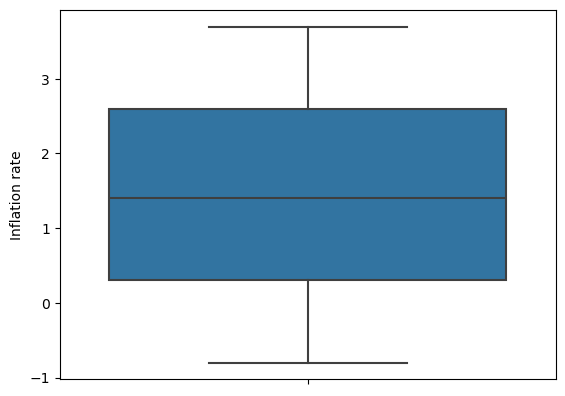

In [20]:
#Checking for outliers
sns.boxplot(y='GDP', data=df)
plt.show()

sns.boxplot(y='Tuition fees up to date', data=df)
plt.show()

sns.boxplot(y='Unemployment rate', data=df)
plt.show()

sns.boxplot(y='Inflation rate', data=df)
plt.show()

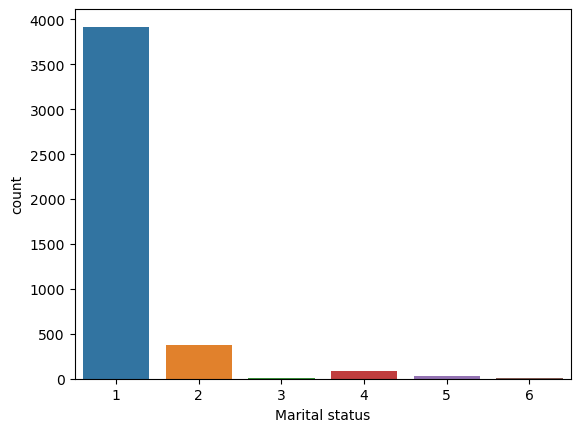

In [24]:
##Creating Countplots for categorical data
sns.countplot(x= 'Marital status', data=df)
plt.show()

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


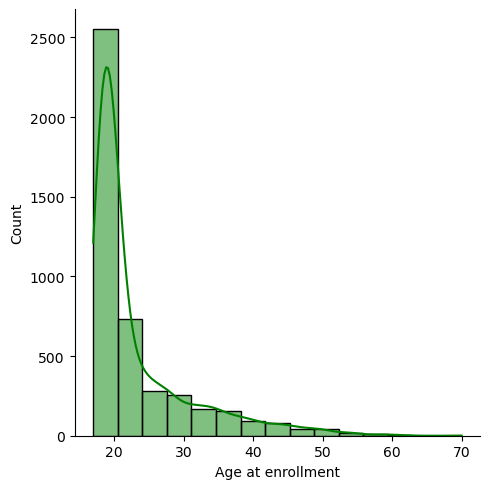

In [33]:
sns.displot(df['Age at enrollment'], bins=15, kde=True, color='green')
plt.show()

In [5]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Using label encoding to encode the Target feature

In [86]:

Target= array(df['Target'])
type(Target)

numpy.ndarray

In [87]:
#Checking the distribution of the Target feature elements
df['Target'].value_counts()
#Graduate----2
#Enrolled----1
#Dropout-----0

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [88]:
#Using LabelEncoding to convert category data to numerical data

label_enc= LabelEncoder() #(creating an instance)
label_enc= label_enc.fit(df['Target'])
print(label_enc.classes_)
print(type(label_enc))

['Dropout' 'Enrolled' 'Graduate']
<class 'sklearn.preprocessing._label.LabelEncoder'>


In [89]:
labels2= label_enc.transform(df['Target'])
print(labels2)
df['Target']=labels2

[0 2 0 ... 0 2 2]


In [16]:
df['Target']

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int32

In [19]:
#Checking the correlation between the features in the dataset
mymatrix=df.corr()

In [21]:
mymatrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.043178
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.001393


In [25]:
!pip install --upgrade notebook

Defaulting to user installation because normal site-packages is not writeable
